In [1]:
#In this project I am supposed to predict the state of the car's driver. There are 10 categories like drowsy, talking on phone etc.
#In this model I have used transger learning (feature extraction) through VGG-16. 

# dataset https://www.kaggle.com/c/state-farm-distracted-driver-detection/data

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [16]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [17]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [18]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=499aa861c97c6d8fcef81d550a3e5cce016915b9f5b4676908a2cbd05a40402b
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [19]:
!kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [01:13<00:00, 33.5MB/s]
100% 4.00G/4.00G [01:13<00:00, 58.5MB/s]


In [20]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip


Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  inflating: imgs/train/c7/img_57559.jpg  
  infla

In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [22]:
my_data_dir = '/content/gdrive/My Drive/Kaggle/imgs'

In [23]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [24]:
test_path = my_data_dir+'/test'
train_path = my_data_dir+'/train'

In [25]:
os.listdir(test_path)

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_100000.jpg',
 'img_100001.jpg',
 'img_100002.jpg',
 'img_100003.jpg',
 'img_100004.jpg',
 'img_100005.jpg',
 'img_100007.jpg',
 'img_100008.jpg',
 'img_100009.jpg',
 'img_10001.jpg',
 'img_100010.jpg',
 'img_100011.jpg',
 'img_100012.jpg',
 'img_100013.jpg',
 'img_100014.jpg',
 'img_100016.jpg',
 'img_100017.jpg',
 'img_100018.jpg',
 'img_100019.jpg',
 'img_10002.jpg',
 'img_100020.jpg',
 'img_100022.jpg',
 'img_100023.jpg',
 'img_100024.jpg',
 'img_100025.jpg',
 'img_100028.jpg',
 'img_100030.jpg',
 'img_100031.jpg',
 'img_100032.jpg',
 'img_100033.jpg',
 'img_100034.jpg',
 'img_100035.jpg',
 'img_100037.jpg',
 'img_100038.jpg',
 'img_100039.jpg',
 'img_10004.jpg',
 'img_100040.jpg',
 'img_100042.jpg',
 'img_100043.jpg',
 'img_100044.jpg',
 'img_100047.jpg',
 'img_100049.jpg',
 'img_10005.jpg',
 'img_100051.jpg',
 'img_100052.jpg',
 'img_100053.jpg',
 'img_100054.jpg',
 'img_100055.jpg',
 'img_100056.jpg',
 'img_10005

In [26]:
os.listdir(train_path)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [27]:
os.listdir(train_path+'/c0')[0]

'img_100026.jpg'

In [28]:
c0_img = train_path+'/c0'+'/img_100026.jpg'

In [29]:
c0_img= imread(c0_img)

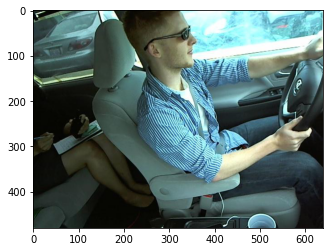

In [30]:
plt.imshow(c0_img)

In [31]:
c0_img.shape

(480, 640, 3)

In [32]:
os.listdir(train_path+'/c1')[0]

'img_100021.jpg'

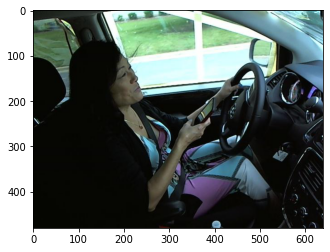

In [33]:
c1_img_path = train_path+'/c1'+ '/img_100021.jpg'
c1_img = imread(c1_img_path)
plt.imshow(c1_img)

In [34]:
len(os.listdir(train_path+'/c0'))

2489

In [35]:
len(os.listdir(train_path+'/c1'))

2267

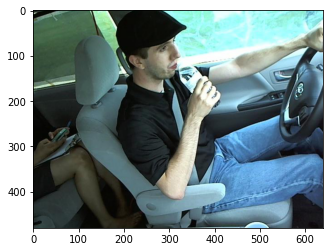

In [36]:
test_img_path = test_path+'/img_100161.jpg'
test_1_img = imread(test_img_path)
plt.imshow(test_1_img)

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [38]:
from keras.layers import Input, Lambda, Dense, Flatten

In [39]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator



In [40]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               validation_split = 0.2
                               )

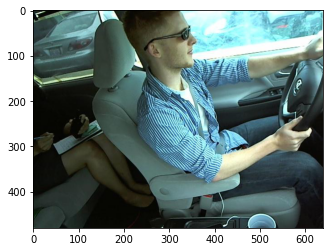

In [41]:
plt.imshow(c0_img)

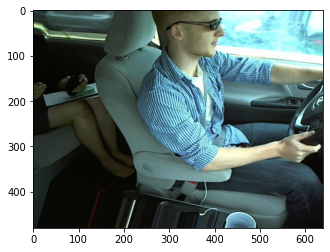

In [42]:
plt.imshow(image_gen.random_transform(c0_img))

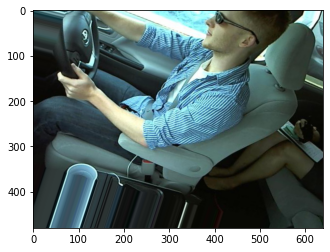

In [43]:
plt.imshow(image_gen.random_transform(c0_img))

In [44]:
image_gen.flow_from_directory(train_path)

Found 22424 images belonging to 10 classes.


In [45]:
from keras import applications

In [46]:
input_tensor = Input(shape=(224,224, 3))
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)

# To see the models' architecture and layer names, run the following


58892288/58889256 [==============================] - 1s 0us/step


In [47]:
for layer in vgg_model.layers:
  layer.trainable= False

In [48]:
x= Flatten()(vgg_model.output)

In [49]:
prediction= Dense(10, activation='softmax')(x)

In [50]:
model= Model(inputs=vgg_model.input, outputs=prediction)

In [51]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [55]:
batch_size = 32


In [56]:
image_shape = (224,224,3)

In [57]:
train_generator = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data


Found 17943 images belonging to 10 classes.


In [58]:
validation_generator = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset= 'validation') # set as validation data

Found 4481 images belonging to 10 classes.


In [59]:
train_generator.class_indices

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
results= model.fit_generator(
    train_generator,
    validation_data = validation_generator, 
    steps_per_epoch=batch_size,
    validation_steps=batch_size,
    callbacks=[early_stop],
    epochs = 300)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/300
32/32 [==============================] - 721s 23s/step - loss: 2.9638 - accuracy: 0.2148 - val_loss: 2.1409 - val_accuracy: 0.3105
Epoch 2/300
32/32 [==============================] - 720s 22s/step - loss: 1.6267 - accuracy: 0.4785 - val_loss: 1.4130 - val_accuracy: 0.5254
Epoch 3/300
32/32 [==============================] - 719s 22s/step - loss: 1.2981 - accuracy: 0.5557 - val_loss: 1.1254 - val_accuracy: 0.6543
Epoch 4/300
32/32 [==============================] - 716s 22s/step - loss: 1.0792 - accuracy: 0.6562 - val_loss: 1.0550 - val_accuracy: 0.6318
Epoch 5/300
32/32 [==============================] - 709s 22s/step - loss: 0.9567 - accuracy: 0.6973 - val_loss: 0.8491 - val_accuracy: 0.7363
Epoch 6/300
32/32 [==============================] - 714s 22s/step - loss: 0.8128 - accuracy: 0.7334 - val_loss: 0.6966 - val_accuracy: 0.7900
Epoch 7/300
32/32 [==============================] - 712s 22s/step

In [63]:
model.save('cardriver_state_model.h5')

In [65]:
from keras.models import load_model
new_model = load_model('cardriver_state_model.h5')

In [68]:
new_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f4274a7b710>>


In [67]:
new_model.get_weights

<bound method Model.get_weights of <tensorflow.python.keras.engine.functional.Functional object at 0x7f4274a7b710>>

In [69]:
losses = pd.DataFrame(model.history.history)

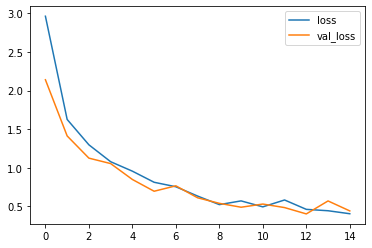

In [70]:
losses[['loss','val_loss']].plot()